In [1]:
import os
import csv

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
pd.__version__
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

In [3]:
AARM_DEVICES = ["jetson_cpu", "jetson_gpu", "rpi4_cpu",]  # pi3_cpu
x86_DEVICES= ["herron_cpu", "herron_gpu", "laptop_cpu"]

In [15]:
VISION_MODELS = [
    'resnet18', 'alexnet', 'squeezenet', 'vgg16', 
    'densenet', 'inception', 'googlenet', 'shufflenet', 
    'mobilenet_v2', 'resnext50_32x4d', 'wide_resnet50_2'
    'mnasnet'
]

EFFICIENT_MODELS = [
    'mobilnet_v2',
#     'mobilenet_v3_large', 'mobilenet_v3_small'
    #
]


In [5]:
EXP_DIR = "experiments/0824_vision/"
DEVICE_LIST = AARM_DEVICES + x86_DEVICES

In [7]:
wallclock_results = pd.concat([
    pd.read_csv(os.path.join(EXP_DIR, f"{device}.csv"))
    for device in DEVICE_LIST
])

In [11]:
wallclock_results


,5_pct,95_pct,accelerator,batch_size,device,max,mean,median,min,model,std
0,0.286171,0.390902,0.0,1.0,jetson_cpu,0.404966,0.345881,0.365948,0.283471,resnet18,0.037744
1,0.281504,0.312829,0.0,1.0,jetson_cpu,0.319534,0.298797,0.297876,0.268178,alexnet,0.011341
2,0.246061,0.327782,0.0,1.0,jetson_cpu,0.331922,0.275518,0.257942,0.241726,squeezenet,0.031908
3,1.718128,1.778368,0.0,1.0,jetson_cpu,1.798475,1.743669,1.741511,1.703321,vgg16,0.019029
4,2.227754,2.757240,0.0,1.0,jetson_cpu,2.799160,2.427593,2.280180,2.086670,densenet,0.227361
...,...,...,...,...,...,...,...,...,...,...,...
9,0.020238,0.032085,0.0,1.0,laptop_cpu,0.036851,0.022949,0.021592,0.019726,mobilenet_v3_large,0.003643
10,0.010492,0.018534,0.0,1.0,laptop_cpu,0.021451,0.012543,0.011320,0.010158,mobilenet_v3_small,0.002691
11,0.091731,0.112422,0.0,1.0,laptop_cpu,0.118980,0.098548,0.096958,0.091128,resnext50_32x4d,0.006446
12,0.193915,0.249852,0.0,1.0,laptop_cpu,0.283028,0.211743,0.203862,0.192653,wide_resnet50_2,0.020227


In [10]:
wallclock_results = pd.DataFrame()

for model in DEVICE_LIST:
    wallclock_results = pd.concat([
        wallclock_results, pd.read_csv(f"{EXP_DIR}/{model}.csv")
        ])

In [6]:
mac_results = pd.read_csv("experiments/0824_flops/laptop_cpu.csv")
# mac_results = mac_results.loc[mac_results['sequence_length'] == 512]

mobilnet_v2


NameError: name 'mac_results' is not defined

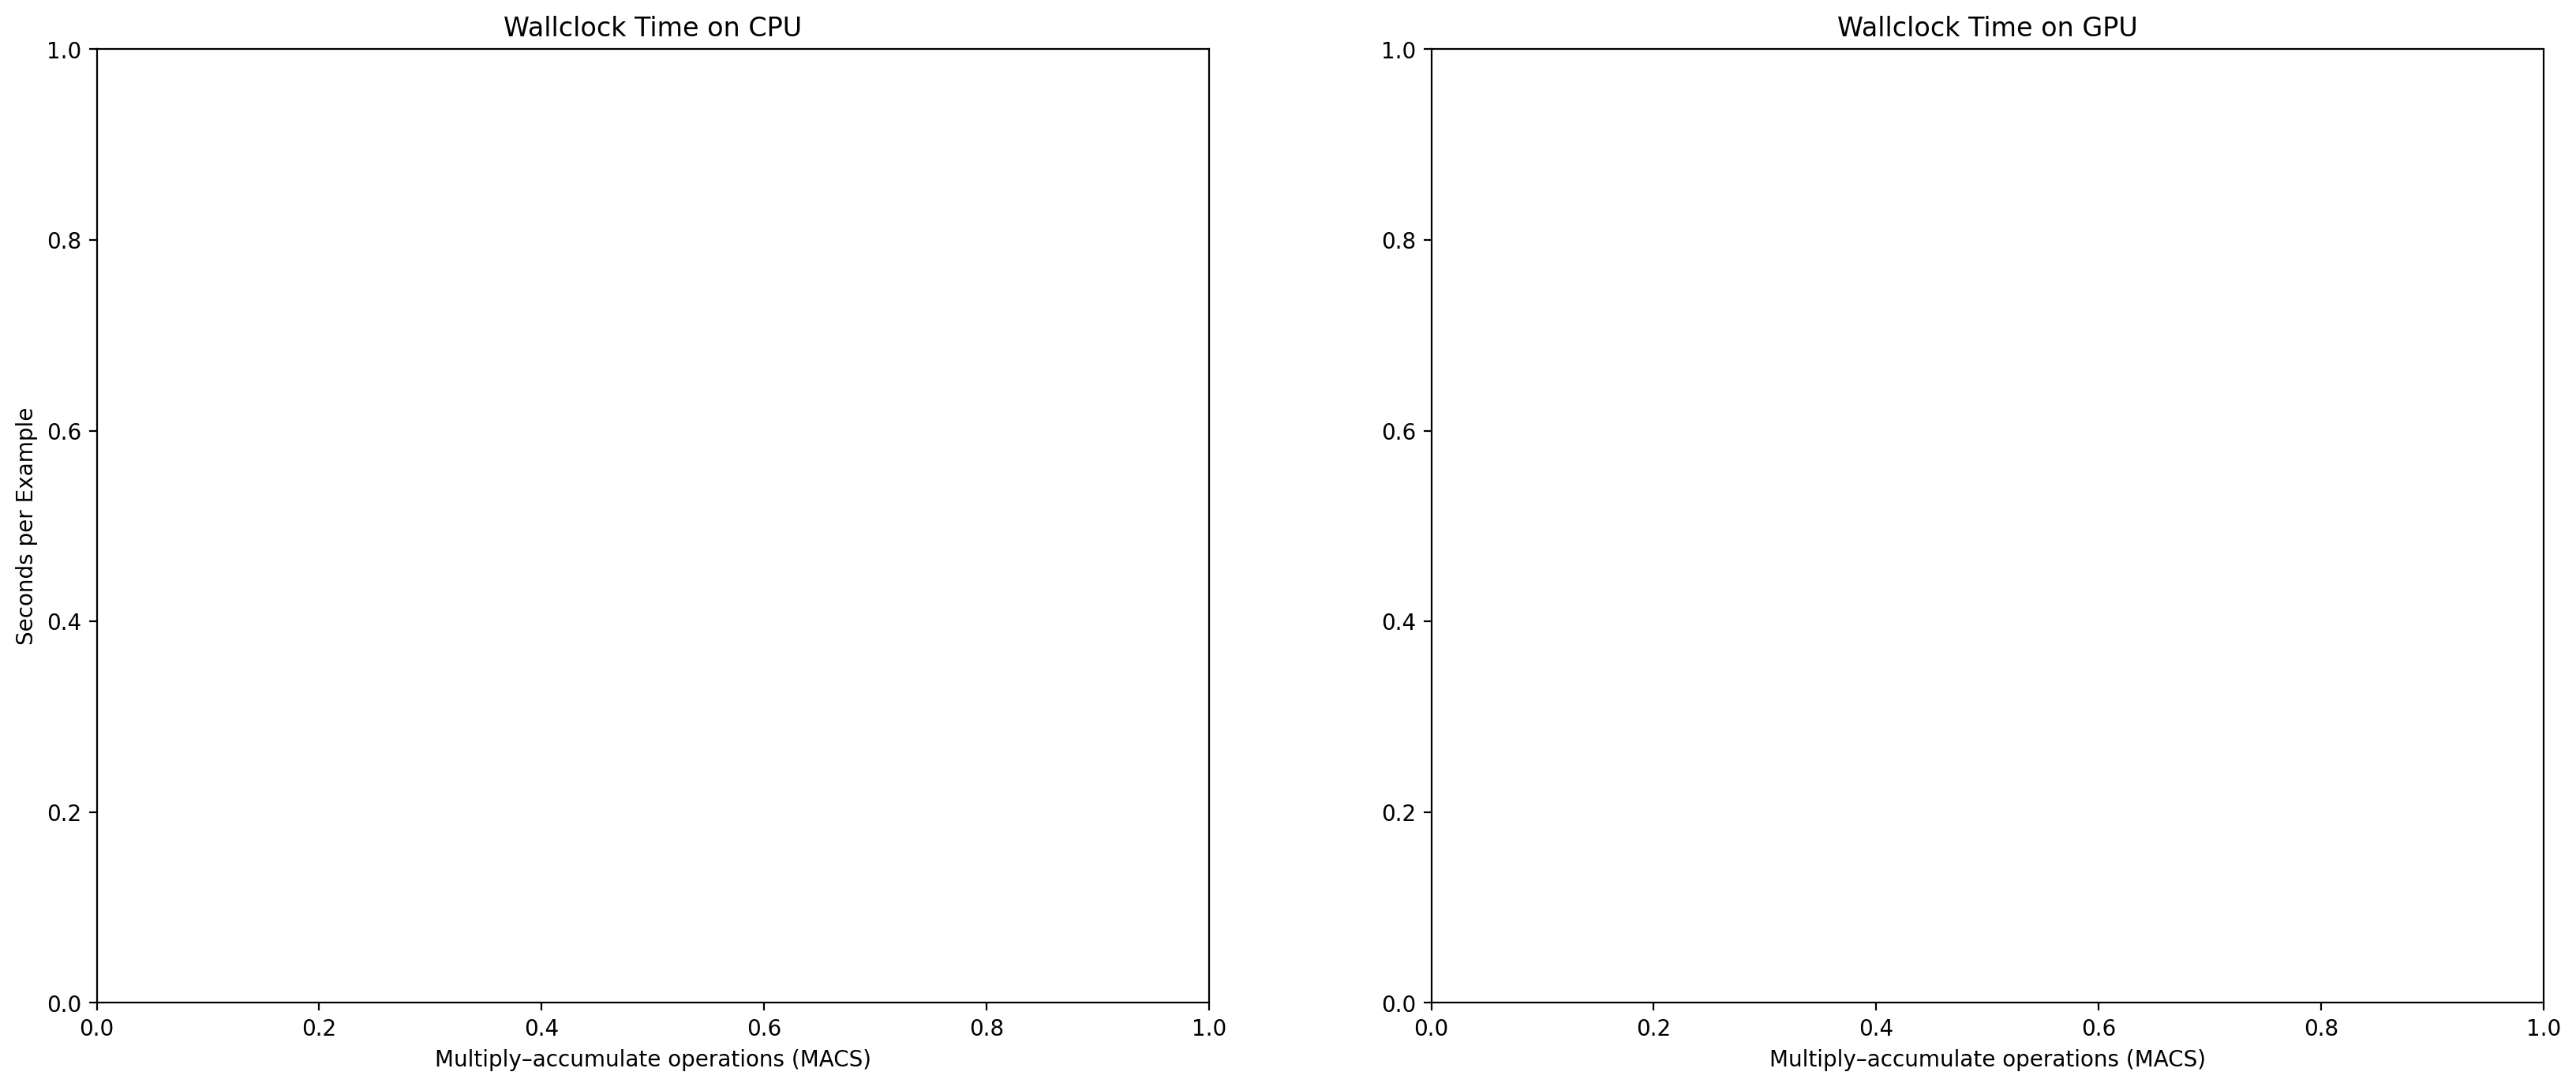

In [16]:
# results_df = wallclock_results.loc[all_results['device'] == 'herron_cpu']
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))

ax1.set_ylabel("Seconds per Example")
ax1.set_xlabel("Multiply–accumulate operations (MACS)")
ax2.set_xlabel("Multiply–accumulate operations (MACS)")

ax1.set_title("Wallclock Time on CPU")
ax2.set_title("Wallclock Time on GPU")

wallclock_time = []
macs = []
for subplot, device in [(ax1, 'herron_cpu'), (ax2, 'herron_gpu')]:
    results_df = wallclock_results.loc[wallclock_results['device'] == device]
    for model in  EFFICIENT_MODELS + ['bert']:
        print(model)
        mac_result = mac_results.loc[mac_results['model'] == model]['macs'].tolist(),
        wallclock_result = results_df.loc[results_df['model'] == model]['mean'].tolist(),

        if model =='bert':
            mac_result = mac_result[0][:-1]
            wallclock_result = wallclock_result[0][:-1]
        subplot.scatter(
            mac_result, wallclock_result, 
            label=f"{model}")
#         plt.annotate(f"{device}-{model}", (mac_results.loc[mac_results['model'] == model]['macs'].tolist()[-1],
#                                      results_df.loc[results_df['model'] == model]['mean'].tolist()[-1]))

#     if model
 
#     wallclock_time.extend(results_df.loc[results_df['model'] == model]['mean'].tolist())
#     macs.extend(mac_results.loc[mac_results['model'] == model]['macs'].tolist())
# plt.legend()
# plt.scatter(macs), len(wallclock_time)

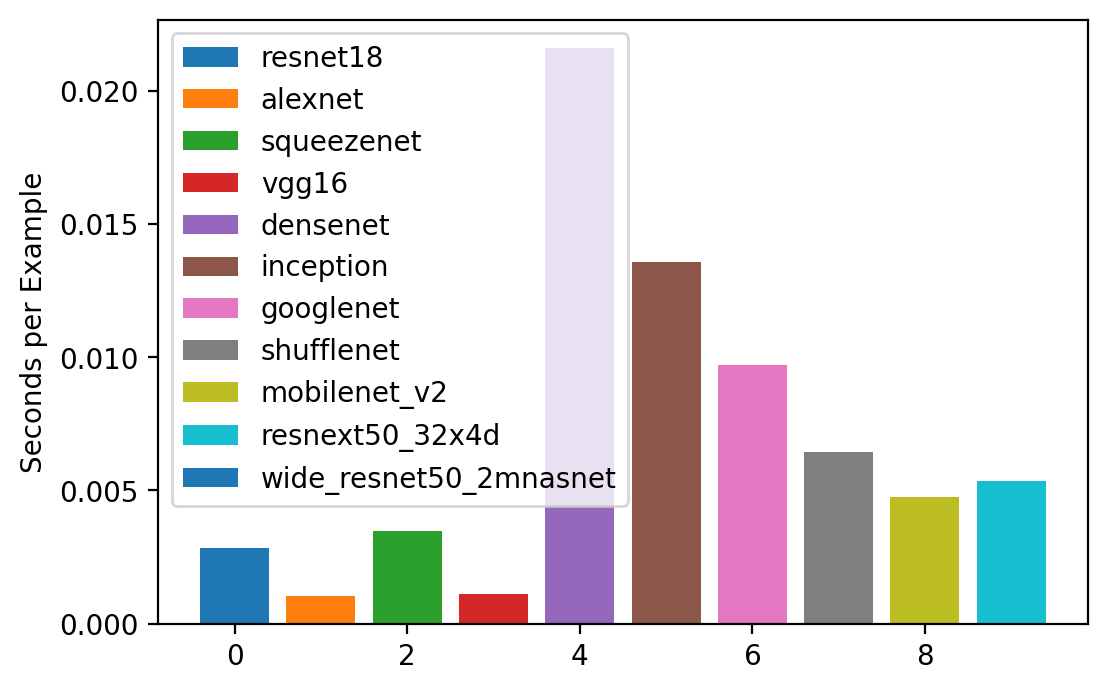

In [21]:
plt.ylabel("Seconds per Example")
# plt.xlabel("Sequence Length")
# plt.xscale('log')

for device in ['herron_gpu']:
    results_df = wallclock_results.loc[wallclock_results['device'] == device]
    for idx, model in enumerate(VISION_MODELS):
        model_entries =  results_df.loc[results_df['model'] == model]
        mean_time = model_entries['mean']

        fifthpct = mean_time - model_entries['5_pct']
        ninetyfifth_time = model_entries['95_pct'] - mean_time
        
        plt.bar(idx, mean_time, label=f"{model}")
        plt.legend()

In [47]:
mean_time =['mean']

In [238]:
wallclocks = pd.read_csv("log/wallclock.csv")
wallclocks.set_index(["Model", "Device"], inplace=True)

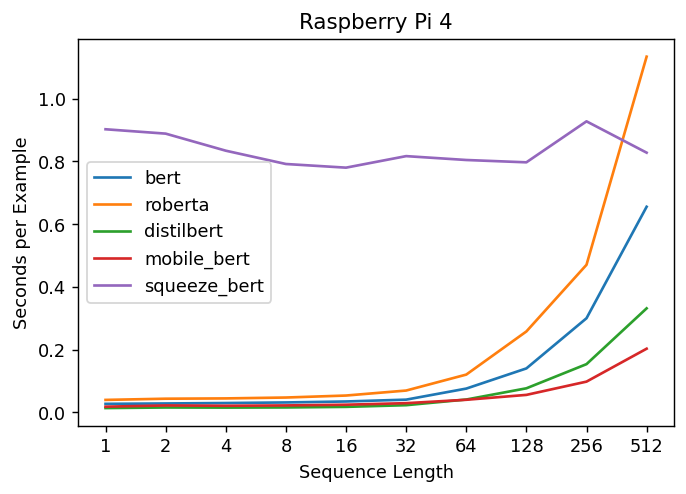

In [260]:
for model in BASELINE_MODELS + EFFICIENT_MODELS:
#     print(model)
    plt.plot(wallclocks.loc[model, "laptop"], label=model)

# plt.yscale('log')
plt.title("Raspberry Pi 4")
plt.ylabel("Seconds per Example")
plt.xlabel("Sequence Length")
plt.legend()

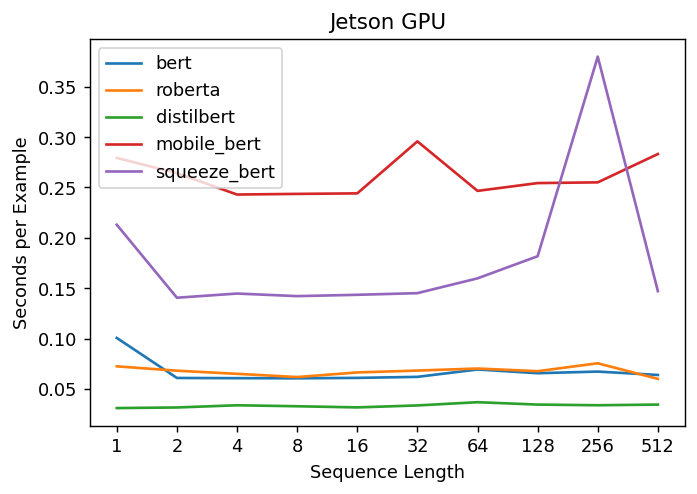

In [259]:
for model in BASELINE_MODELS + EFFICIENT_MODELS:
#     print(model)
    plt.plot(wallclocks.loc[model, "jetson_gpu"], label=model)

# plt.yscale('log')
plt.title("Jetson GPU")
plt.ylabel("Seconds per Example")
plt.xlabel("Sequence Length")
plt.legend(loc='upper left')